### 1. Import libraries

In [13]:
library(ggplot2)
library(bestNormalize)
library(reshape2)

Warning message:
"package 'bestNormalize' was built under R version 3.4.4"

### 2. Import dataset

In [4]:
wines <- read.csv("winequality-red.csv", stringsAsFactors = FALSE, sep=";")
head(wines)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


### 3. Check for normality
Clearly not normal

No id variables; using all as measure variables


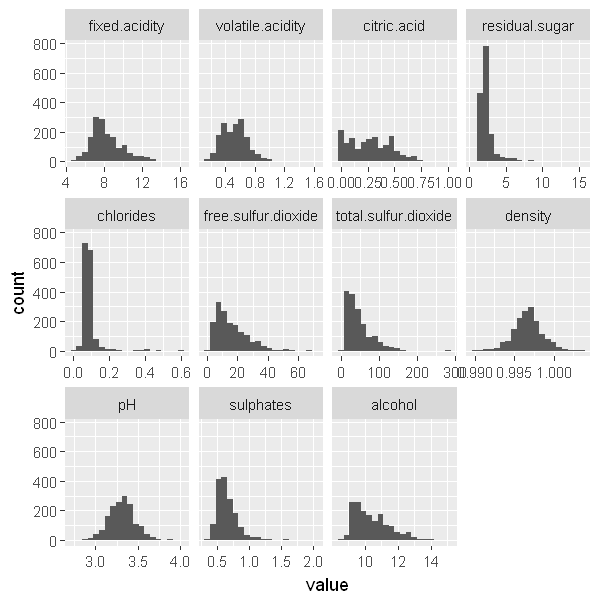

In [74]:
options(repr.plot.width=5, repr.plot.height=5) #Graph sizing in jupyter,for rstudio is not required

ggplot(data = melt(wines[1:11]), mapping = aes(x = value)) + 
    geom_histogram(bins = 20) + facet_wrap(~variable, scales = 'free_x')

### 4. Normalize each column

In [75]:
### Apply best normalize to each column
wines.normal.list <-lapply(wines[1:11], function(x) bestNormalize(x)) 

Warning message in orderNorm(x = c(7.4, 7.8, 7.8, 11.2, 7.4, 7.4, 7.9, 7.3, 7.8, :
"Ties in data, Normal distribution not guaranteed
"Warning message in orderNorm(x = c(0.7, 0.88, 0.76, 0.28, 0.7, 0.66, 0.6, 0.65, :
"Ties in data, Normal distribution not guaranteed
"Warning message in bestNormalize(x):
"boxcox  did not work;  Error in estimate_boxcox_lambda(x, ...) : x must be positive
"Warning message in orderNorm(x = c(0, 0, 0.04, 0.56, 0, 0, 0.06, 0, 0.02, 0.36, :
"Ties in data, Normal distribution not guaranteed
"Warning message in orderNorm(x = c(1.9, 2.6, 2.3, 1.9, 1.9, 1.8, 1.6, 1.2, 2, 6.1, :
"Ties in data, Normal distribution not guaranteed
"Warning message in orderNorm(x = c(0.076, 0.098, 0.092, 0.075, 0.076, 0.075, 0.069, :
"Ties in data, Normal distribution not guaranteed
"Warning message in orderNorm(x = c(11, 25, 15, 17, 11, 13, 15, 15, 9, 17, 15, 17, :
"Ties in data, Normal distribution not guaranteed
"Warning message in orderNorm(x = c(34, 67, 54, 60, 34, 40, 59, 21, 18

In [76]:
#convert list to a dataframe 
# sorry adrianna, could not think of an apply function for this
normalized <- wines.normal.list[[1]][[1]]
for (i in 2:11){
  normalized <- cbind(normalized ,wines.normal.list[[i]][[1]])
}
colnames(normalized) <- colnames(wines[1:11])
head(normalized)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
-0.39800704,1.0677684,-1.732835,-0.5883282,-0.2501130,-0.26144417,-0.12487186,0.64045782,1.2779984,-0.5664998,-1.0204818
-0.08155574,1.7881612,-1.732835,0.5120290,1.0086865,0.89063503,0.79026161,0.04231197,-0.7367901,0.3842180,-0.3326811
-0.08155574,1.3292970,-0.984235,0.1224601,0.7419378,0.13435103,0.49496475,0.17239755,-0.3567887,0.1794473,-0.3326811
1.42209043,-1.5392224,1.450658,-0.5883282,-0.3285445,0.34429426,0.62514636,0.76168170,-1.0112955,-0.3807280,-0.3326811
-0.39800704,1.0677684,-1.732835,-0.5883282,-0.2501130,-0.26144417,-0.12487186,0.64045782,1.2779984,-0.5664998,-1.0204818
-0.39800704,0.8227943,-1.732835,-0.8153845,-0.3285445,-0.05015358,0.07841241,0.64045782,1.2779984,-0.5664998,-1.0204818


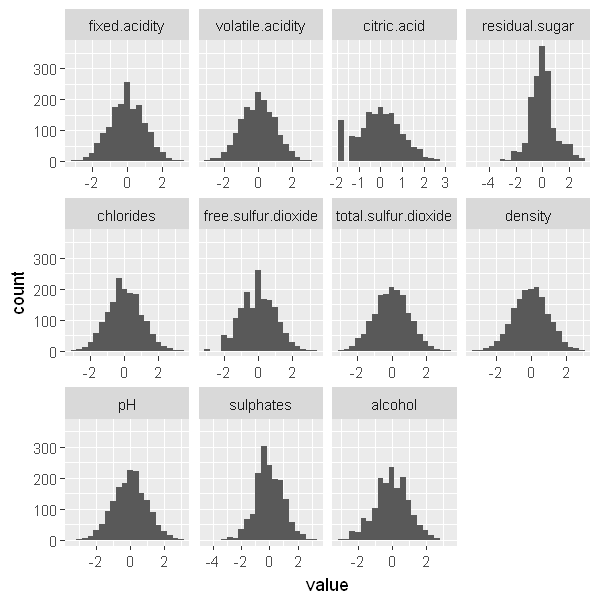

In [77]:
options(repr.plot.width=5, repr.plot.height=5) #Graph sizing in jupyter,for rstudio is not required

ggplot(data = melt(normalized), mapping = aes(x = value)) + 
    geom_histogram(bins = 20) + facet_wrap(~Var2, scales = 'free_x')

### 5. Run PCA analisys

In [78]:
source("PCA_functions.R")
my.pca.results<-my.pca(normalized)
my.pca.results

All 1599 observations are valid.


0.49385424,-0.10320811,0.08372193,0.05997775,-0.175568059,0.01772447,0.31763114,-0.35669620,0.29509148,-0.097332400,0.61565963
-0.19108564,0.36969611,0.40537321,-0.16592622,0.008445492,0.25493873,0.60477523,-0.08539877,-0.38171810,0.224346735,0.02829900
0.43060271,-0.21526174,-0.23749619,0.04432291,-0.128409028,0.03381122,-0.17579176,-0.20315181,-0.70470738,0.350478334,-0.02493390
0.20006894,0.18008483,-0.03402060,-0.75462439,-0.316506463,-0.09561137,-0.14540732,0.42928971,0.03496331,0.089552902,0.18147597
0.26473246,0.27401203,0.23210064,-0.09541398,0.408765941,0.60602001,-0.47955251,-0.13096752,0.09366441,-0.022036885,0.03358577
-0.04481846,0.44263957,-0.52589675,0.09314265,-0.090209514,0.07252743,0.06062640,-0.18731843,0.36549869,0.569777657,-0.08013090
0.03534138,0.51444122,-0.44078193,0.11602226,-0.096455317,0.06088779,0.04723837,0.01104177,-0.29718712,-0.642362473,0.10018617
0.42648460,0.23875139,0.19793513,-0.17368971,0.068008948,-0.43422988,0.08778256,-0.33442321,0.10148108,-0.142210865,-0.59035110
-0.42140758,0.06655836,-0.03293018,-0.32582365,0.242910841,-0.37615048,-0.26743171,-0.54318160,-0.13383184,0.009939461,0.35449908
0.19594962,-0.13597155,-0.34401608,-0.17751531,0.763976792,-0.09653411,0.35956062,0.24988094,-0.02418701,0.036639592,0.08139759
-0.15145062,-0.39789703,-0.29625119,-0.44538441,-0.143585860,0.45696383,0.19215715,-0.34384056,0.09950134,-0.223412688,-0.29700394
